## Постановка задачи
Целью исследования является анализ производительности алгоритмов решения задачи достижимости между всеми парами вершин и с заданным множеством стартовых вершин с регулярными ограничениями.
Исследование затрагивает следующие задачи:
- Достижимость между всеми парами вершин: для каждой пары вершин $(u, v)$ в графе необходимо определить, существует ли путь из $u$ в $v$, удовлетворяющий заданному регулярному ограничению.
- Достижимость для заданного множества стартовых вершин: дано множество стартовых вершин $S \subseteq V$ ($V$ - множество всех вершин графа). Необходимо для каждой вершины $v \in S$ определить, существует ли путь из нее в любую другую вершину графа, удовлетворяющий ограничению, заданному регулярным выражением. 

### Исследовательские вопросы

Для достижения цели исследования были сформулированы следующие вопросы:
1. Какое представление разреженных матриц и векторов лучше подходит для каждой из решаемых задач?
2. Начиная с какого размера стартового множества $S$ выгоднее решать задачу для всех пар и выбирать нужные?

## Описание исследуемых решений

### Достижимость между всеми парами вершин
Задача о достижимости между всеми парами вершин может быть решена при помощи алгоритма на основе тензорного произведения матриц смежности: строятся два автомата - один на основе регулярного выражения, а другой на основе матрицы смежности графа. Далее при помощи тензорного произведение находим пересечение языков, распознаваемых данными автоматами, а при помощи транзитивного замыкания находим все пары вершин из условия.

### Достижимость для заданного множества стартовых вершин
Задачча о достижимости для заданного множества стартовых вершин может быть решена при помощи алгоритма на основе multiple source BFS: аналорично предыдущему пункту строятся два автомата, по которым затем "параллельно" совершаем обход в ширину из всех стартовых состояний.


## Описание набора данных для экспериментов
В таблице приведены данные графов, выбранных для исследования

| Граф  | Количество вершин | Количество ребер | Уникальные метки |
|-------|-------------------|------------------|------------------|
| atom  | 291               | 425              | 17               |
| foaf  | 256               | 631              | 15               |
| wc    | 332               | 269              | 2                |
| skos  | 144               | 252              | 21               |

Выбор такого набора обусловлен в первую очередь различием в количестве вершин по отношению к количеству ребер для каждого отдельного графа. В наборе есть графы с приблизительно одинаковым количеством/с большим количеством ребер/вершин. При этом учитывались и размеры графов - подбирались таким образом, тчобы было возможно провести замеры за разумное время.

Опишем теперь запросы к данным графам: пусть $l1, l2, l3, l4$ - самые часто встречающиеся метки в графе (если меток всего 2, как у `wc`, то считаем, что $l1 = l2$ и $l2 = l4$)
- $(l1 | l2)* l3$
- $(l3 | l4)+ l1*$
- $l1 l2 l3 (l4|l1)*$
- $(l1 l2) | (l3 l4)$

Данный набор запросов включает в себя все основные операции над регулярными языками, также запросы предполагают разное количество состояний и переходов в КА, что также влияет и на разряженность матрицы, следовательно эксперимент можно будет считать более полным.

## Описание эксперимента

### Оборудование
Вычислительное устройство под управлением ОС `Windows 10 Home` с характеристиками:
- Процессор: `AMD Ryzen 5 5500U`
  -  Общее количество ядер - 6 с масимальным числом потоков = 12
  -  Размер `L2` = 3Мб, `L3` = 16Мб
- Объем оперативной памяти: 16Гб
- Python 3.11.9

### Этапы проведения эксперимента
В данном разделе будут описаны шаги, совершение которых позволит достичь цели эксперимента и ответить на поставленные в первой секции вопросы:
- **Какое представление разреженных матриц и векторов лучше подходит для каждой из решаемых задач?**

Стоит сначала определиться с исследуемыми типами представления разряженных матриц. Были выбраны 
[csc_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html#scipy.sparse.csc_matrix), [csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix), [dok_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.dok_matrix.html#scipy.sparse.dok_matrix), [lil_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.lil_matrix.html#scipy.sparse.lil_matrix) -- все они являются частью библиотеки `scipy` и поддерживают все необходимые в ходе эксперимента операции.
Для каждого алгоритма и графа будем считать среднее по 25 запускам на различных типах разреженных матриц и различных регуярных запросах. В качестве стартовых и финальных вершин графа выберем все вершины.
- **Начиная с какого размера стартового множества выгоднее решать задачу для всех пар и выбирать нужные?**

Размер стартового множества определяется процентом от общего числа вершин графа, и в качестве рассматриваемых размеров стартовых множеств были выбраны 10%, 30%, 70% и 100% - такой набор позволлит рассмотреть большой диапазон значений при относительно небольшых количествах запусков. 


## Эксперимент

### Сравнение графов
Для демонсрации полноты набора тестовых графов, выведем данные о них на общем графике:

import sources directory


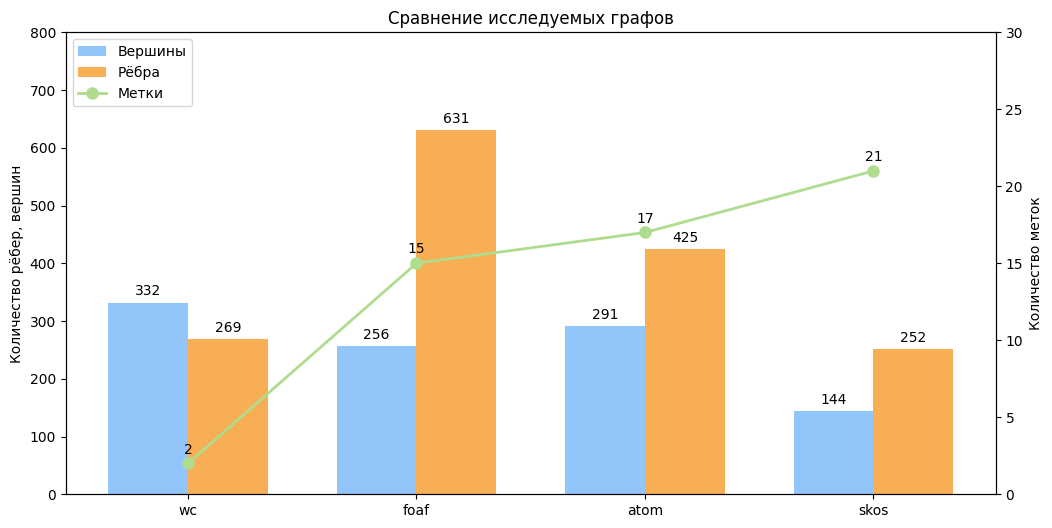

In [ ]:
from project.task1 import get_graph_summary
from project.task3 import tensor_based_rpq
from project.task4 import ms_bfs_based_rpq

from dataclasses import dataclass
from typing import List
import logging
import time
import numpy as np
import cfpq_data
from scipy.sparse import csc_matrix, csr_matrix, dok_matrix, lil_matrix
import matplotlib.pyplot as plt
import warnings
from scipy.sparse import SparseEfficiencyWarning

GRAPHS = ["atom", "foaf", "wc", "skos"]
COLORS = {
    "nodes": "#92C5F9",
    "edges": "#F8AE54", 
    "labels": "#AFDC8F"
}

logging.disable(logging.INFO)
warnings.filterwarnings("ignore", category=SparseEfficiencyWarning)

@dataclass
class GraphMetrics:
    name: str
    nodes: int
    edges: int
    labels: int

class GraphVisualizer:
    def __init__(self, min_figure_width: int = 12):
        self.min_figure_width = min_figure_width
        
    def prepare_data(self) -> List[GraphMetrics]:
        metrics = []
        for graph_name in GRAPHS:
            data = get_graph_summary(graph_name)
            metrics.append(GraphMetrics(
                name=graph_name,
                nodes=data.vertex_count,
                edges=data.edge_count,
                labels=len(data.edge_labels)
            ))
        return sorted(metrics, key=lambda x: x.labels)

    def create_plot(self, metrics: List[GraphMetrics]):
        n_graphs = len(metrics)
        fig_width = max(self.min_figure_width, n_graphs * 2)
        fig, ax1 = plt.subplots(figsize=(fig_width, 6))
        ax2 = ax1.twinx()
        return fig, ax1, ax2

    def plot_bars(self, ax, x_positions, metrics: List[GraphMetrics]):
        width = 0.35
        nodes_bars = ax.bar(x_positions - width/2, 
                           [m.nodes for m in metrics], 
                           width, 
                           label="Вершины", 
                           color=COLORS["nodes"])
        edges_bars = ax.bar(x_positions + width/2, 
                           [m.edges for m in metrics], 
                           width, 
                           label="Рёбра", 
                           color=COLORS["edges"])
        return nodes_bars, edges_bars

    def plot_line(self, ax2, x_positions, metrics: List[GraphMetrics]):
        line = ax2.plot(x_positions, 
                    [m.labels for m in metrics],
                    label="Метки",
                    color=COLORS["labels"],
                    marker="o",
                    linewidth=2,
                    markersize=8)
        return line

    def add_labels(self, ax, bars, values):
        for bar, value in zip(bars, values):
            ax.annotate(f"{value}",
                       xy=(bar.get_x() + bar.get_width()/2, value),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha="center",
                       va="bottom")

    def plot_summary_table(self, ax, metrics: List[GraphMetrics]):
        table_data = [[m.name, m.nodes, m.edges, m.labels] for m in metrics]
        columns = ['График', 'Вершины', 'Рёбра', 'Метки']
        ax.axis('tight')
        ax.axis('off')
        table = ax.table(cellText=table_data,
                        colLabels=columns,
                        cellLoc='center',
                        loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1.2, 1.5)

    def visualize(self):
        metrics = self.prepare_data()
        _, ax1, ax2 = self.create_plot(metrics)
        x_positions = np.arange(len(metrics))
        nodes_bars, edges_bars = self.plot_bars(ax1, x_positions, metrics)
        self.plot_line(ax2, x_positions, metrics)
        
        ax1.set_ylabel("Количество рёбер, вершин")
        ax2.set_ylabel("Количество меток")
        ax1.set_title("Сравнение исследуемых графов")
        ax1.set_xticks(x_positions)
        ax1.set_xticklabels([m.name for m in metrics])

        ax1.set_ylim(0, 800)
        ax2.set_ylim(0, 30)

        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
        
        self.add_labels(ax1, nodes_bars, [m.nodes for m in metrics])
        self.add_labels(ax1, edges_bars, [m.edges for m in metrics])

        for i, m in enumerate(metrics):
            ax2.annotate(f"{m.labels}",
                        (x_positions[i], m.labels),
                        xytext=(0, 5),
                        textcoords="offset points",
                        ha="center",
                        va="bottom")

visualizer = GraphVisualizer()
visualizer.visualize()

### Какое представление разреженных матриц и векторов лучше подходит для каждой из решаемых задач

C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
C:\Users\artem\AppData\Local

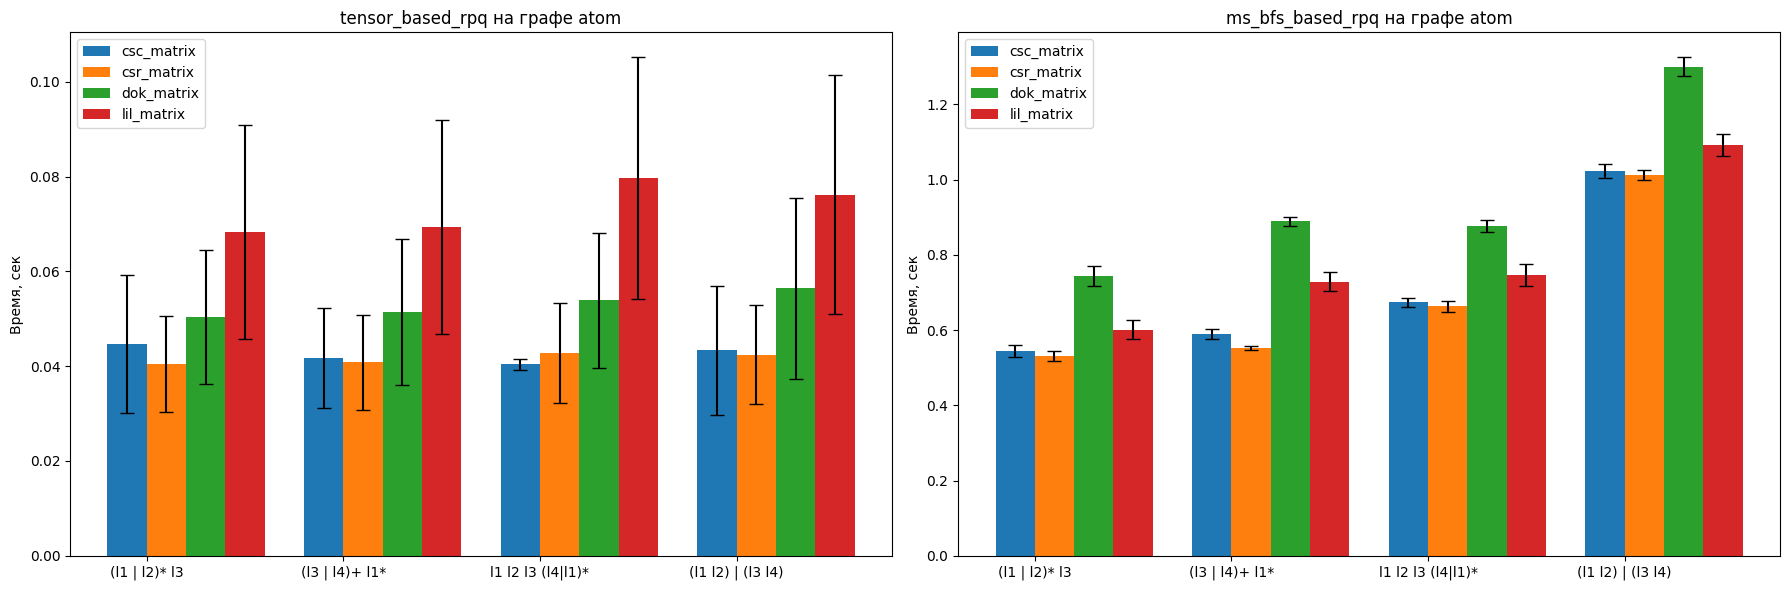

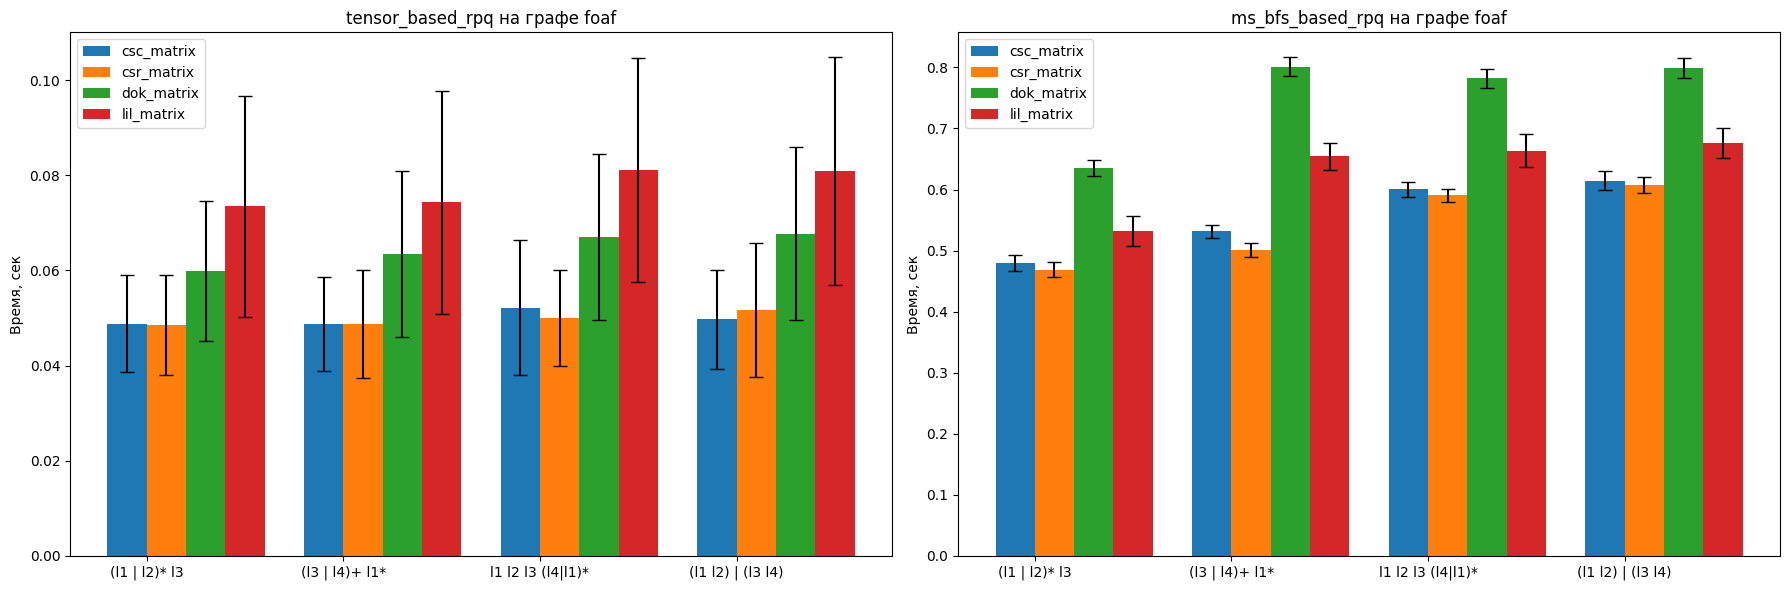

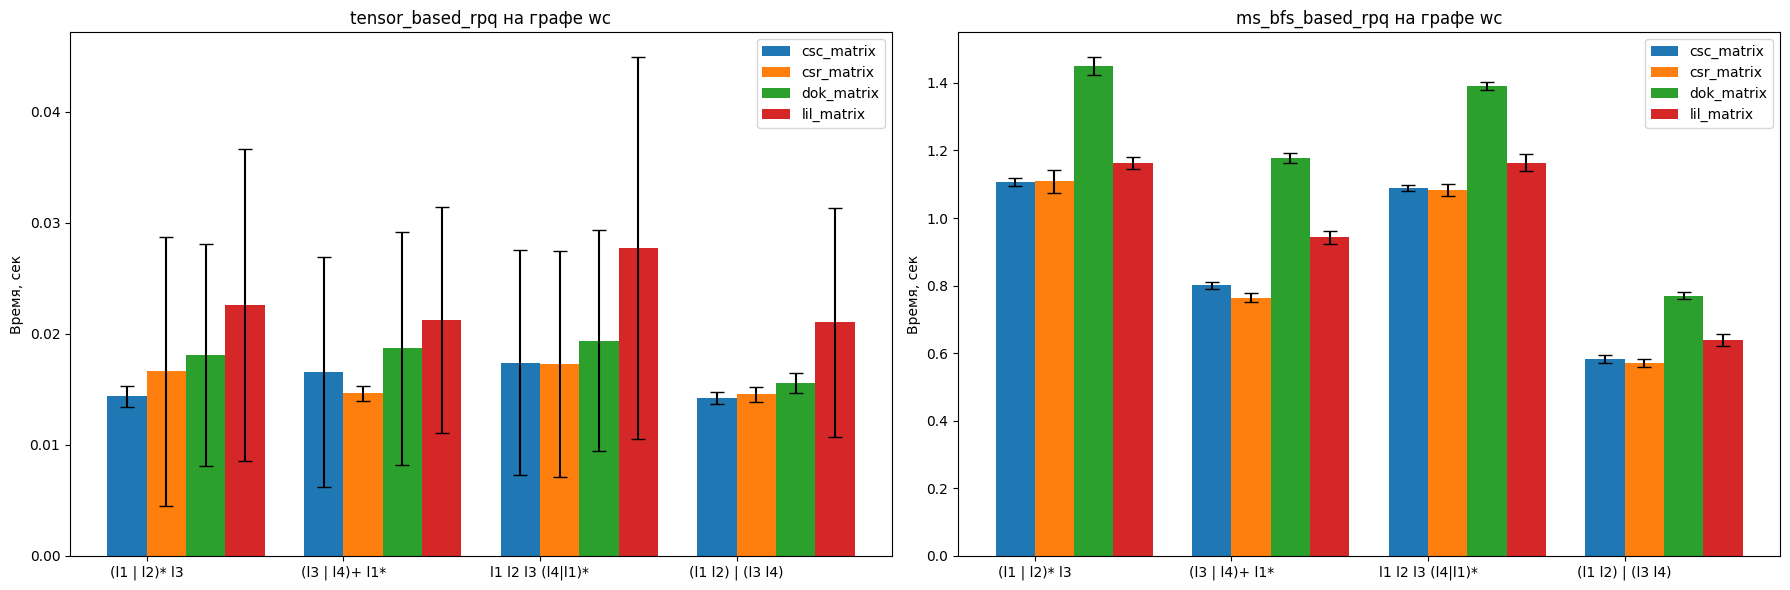

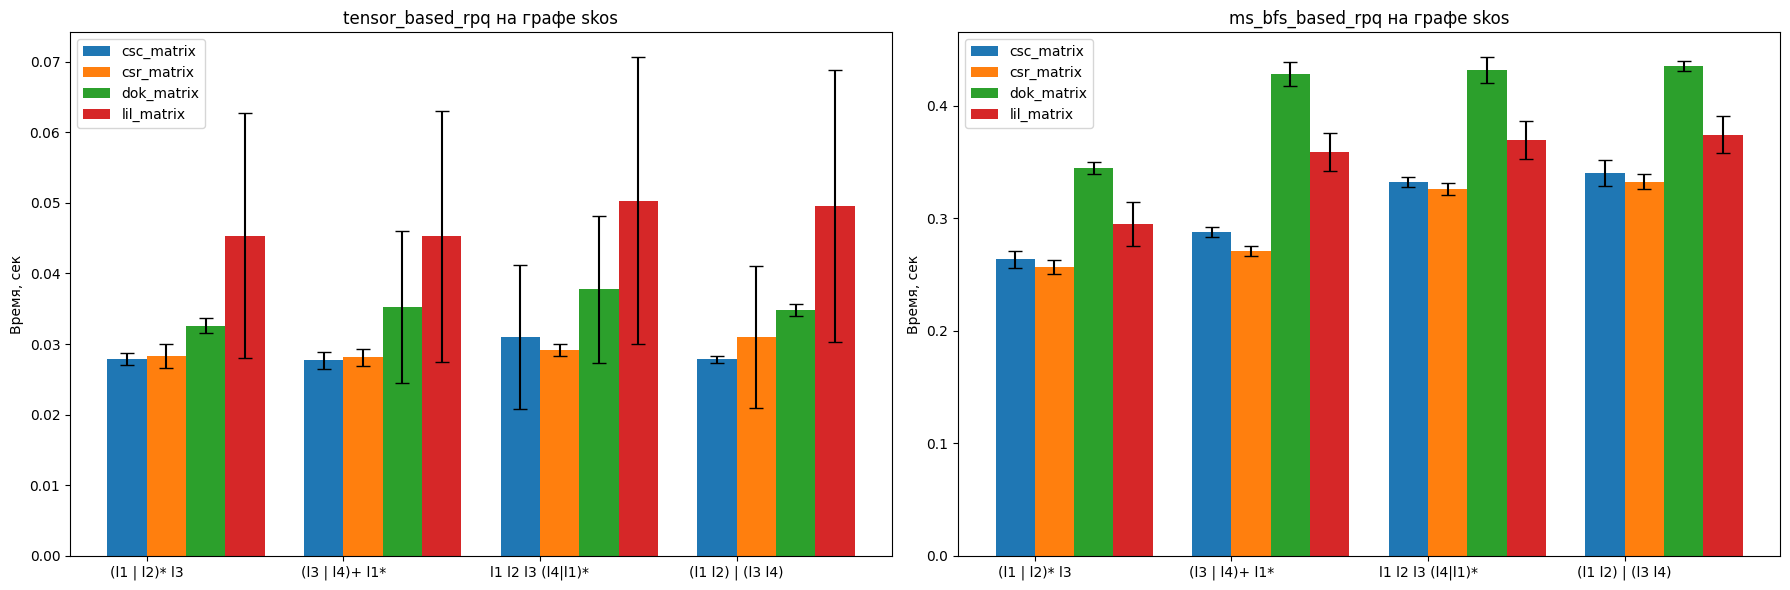

In [2]:
REGEX_TEMPLATE = [
    "({l1} | {l2})* {l3}",
    "({l3} | {l4})+ {l1}*",
    "{l1} {l2} {l3} ({l4}|{l1})*",
    "({l1} {l2}) | ({l3} {l4})",
]
SCIPY_MITRICIES = [csc_matrix, csr_matrix, dok_matrix, lil_matrix]
NUM_OF_EXPERIMENTS = 25

def regex_with_specified_labels(labels):
    # for cases with len(labels)=2
    labels = labels * (4 // len(labels)) + labels[: 4 % len(labels)]
    l1, l2, l3, l4 = labels[:4]
    regexes = [
        template.format(l1=l1, l2=l2, l3=l3, l4=l4) for template in REGEX_TEMPLATE
    ]

    return regexes

def run_experiment(method: callable, regex: str, graph, matrix_class):
    times = []
    for _ in range(NUM_OF_EXPERIMENTS):
        start_time = time.time()
        method(regex, graph, {}, {}, matrix_class)
        final_time = time.time()
        times.append(final_time - start_time)
    return np.mean(times), np.std(times)


def run_rpq_tests(graph_name, method):
    timing_results = {matrix.__name__: [] for matrix in SCIPY_MITRICIES}
    error_results = {matrix.__name__: [] for matrix in SCIPY_MITRICIES}

    graph = cfpq_data.graph_from_csv(cfpq_data.download(graph_name))
    regex_patterns = regex_with_specified_labels(cfpq_data.get_sorted_labels(graph))

    for matrix_class in SCIPY_MITRICIES:
        for regex in regex_patterns:
            mean, std = run_experiment(
                method, regex, graph, matrix_class
            )
            timing_results[matrix_class.__name__].append(mean)
            error_results[matrix_class.__name__].append(std)

    return timing_results, error_results

def create_bar_plot(ax, data, graph_name, algorithm_name, x, width, cleaned_regex_patterns):
    for i, matrix_class in enumerate(SCIPY_MITRICIES):
        matrix_name = matrix_class.__name__
        ax.bar(
            x - width / 2 + i * width,
            data[graph_name]["timing"][matrix_name],
            width,
            yerr=data[graph_name]["error"][matrix_name],
            label=matrix_name,
            capsize=5,
        )
    
    ax.set_xticks(x)
    ax.set_xticklabels(cleaned_regex_patterns)
    ax.set_ylabel("Время, сек")
    ax.set_title(f"{algorithm_name} на графе {graph_name}")
    ax.legend()

def plot_results(graph_name, tensor_results, bfs_results):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    
    regex_patterns = [regex.replace("{", "").replace("}", "") for regex in REGEX_TEMPLATE]
    width = 0.2
    x = np.arange(len(regex_patterns))

    create_bar_plot(ax1, tensor_results, graph_name, tensor_based_rpq.__name__, x, width, regex_patterns)
    create_bar_plot(ax2, bfs_results, graph_name, ms_bfs_based_rpq.__name__, x, width, regex_patterns)

    plt.tight_layout()
    plt.show()
    
    return fig

tensor_results = {}
bfs_results = {}

for graph_name in GRAPHS:
    tensor_timing, tensor_error = run_rpq_tests(graph_name, tensor_based_rpq)
    bfs_timing, bfs_error = run_rpq_tests(graph_name, ms_bfs_based_rpq)

    tensor_results[graph_name] = {"timing": tensor_timing, "error": tensor_error}
    bfs_results[graph_name] = {"timing": bfs_timing, "error": bfs_error}

for graph_name in GRAPHS:
    plot_results(graph_name, tensor_results, bfs_results)

При анализе графиков можно сделать вывод, что матрицы типа `csr_matrix` и `csc_matrix` дают одинаковую производительность для обоих алгоритмов, и при этом лучше подходят для реализации по сравнению с `dok_matrix` и `lil_matrix`. `dok_matrix` показал относительно неплохую производительность в тензорном произведении, однако оказался худшим в алгоритме поиска в ширину.
Результат можно объяснить тем, что последние два типа матриц не подходят для арифметических операций и матричный вычислений, и применяются чаще в случаях необходимости инкрементального построения матрицы или структурного изменения в процессе работы.

### Сравнение размера стартового множества

C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
C:\Users\artem\AppData\Local

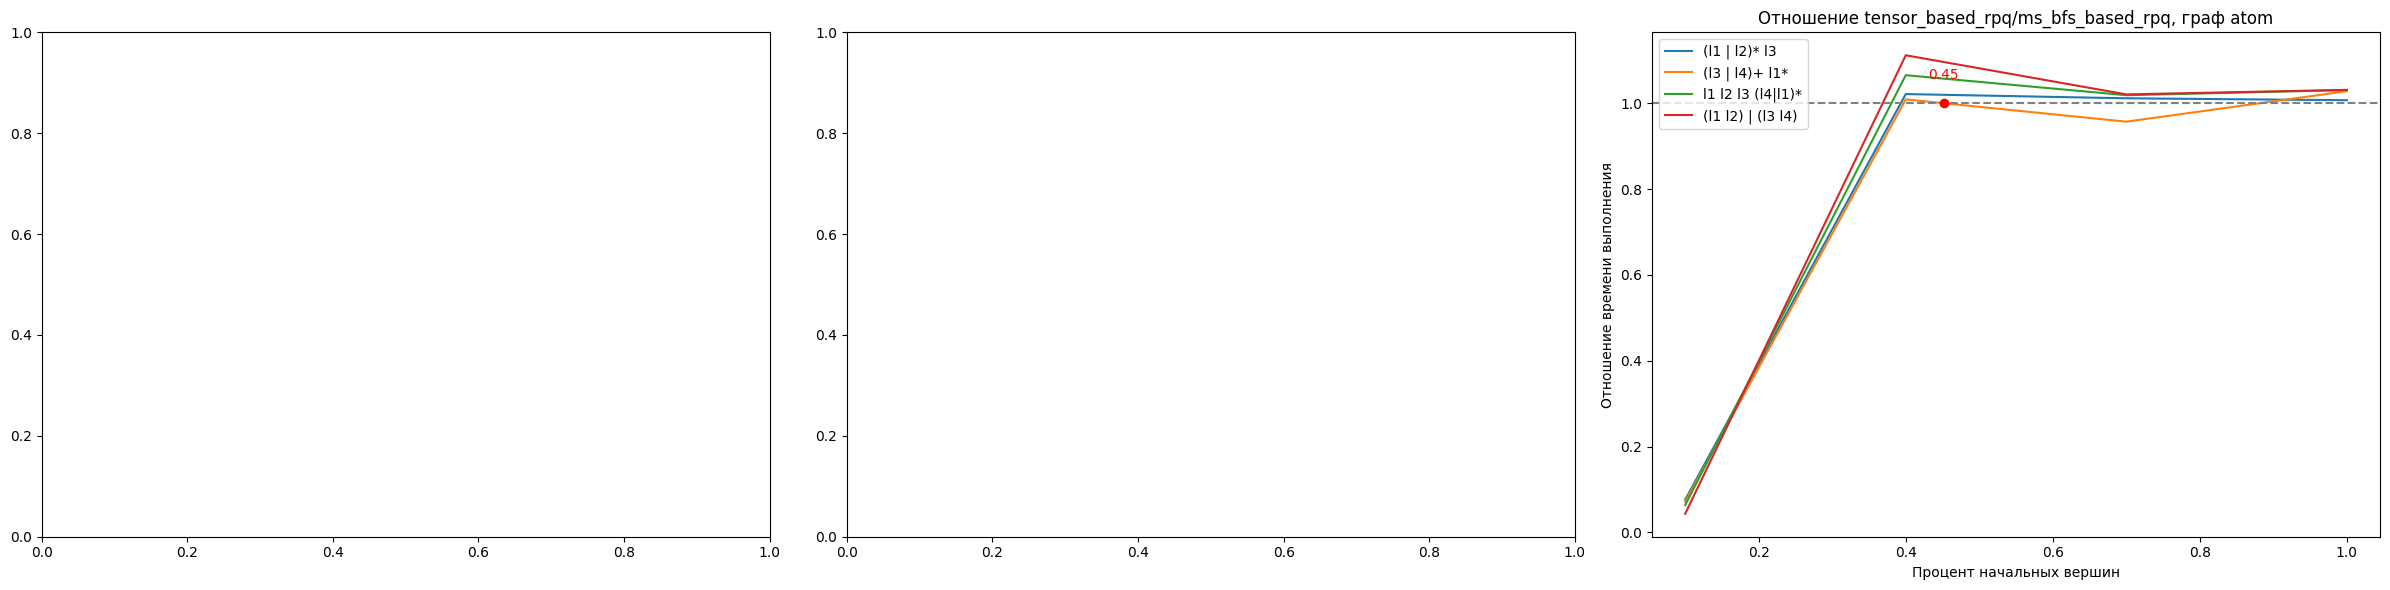

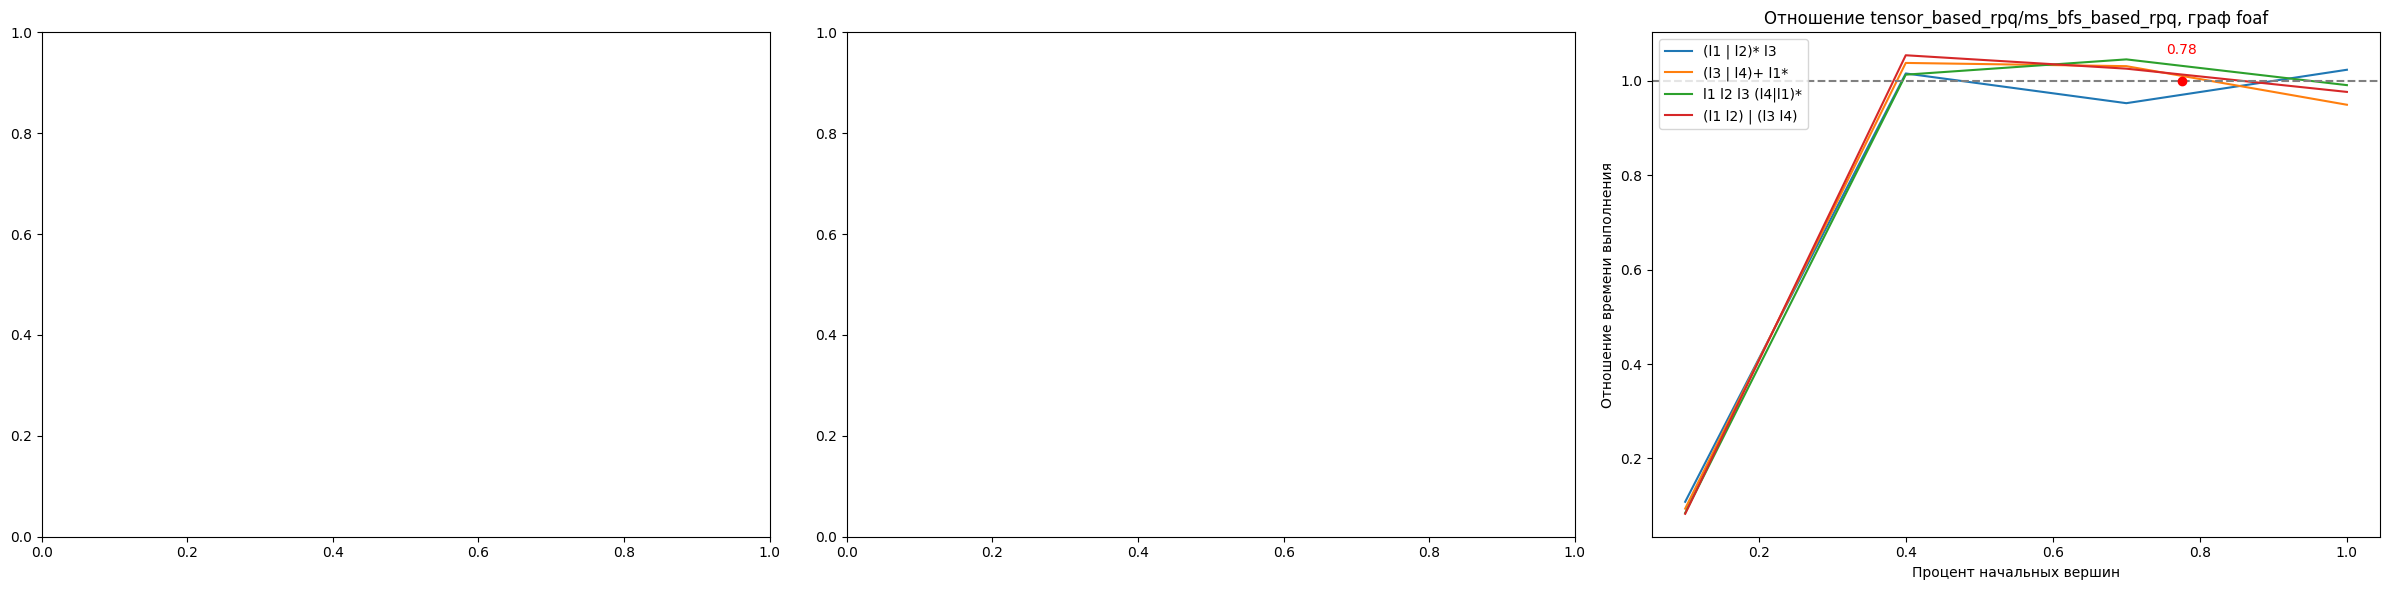

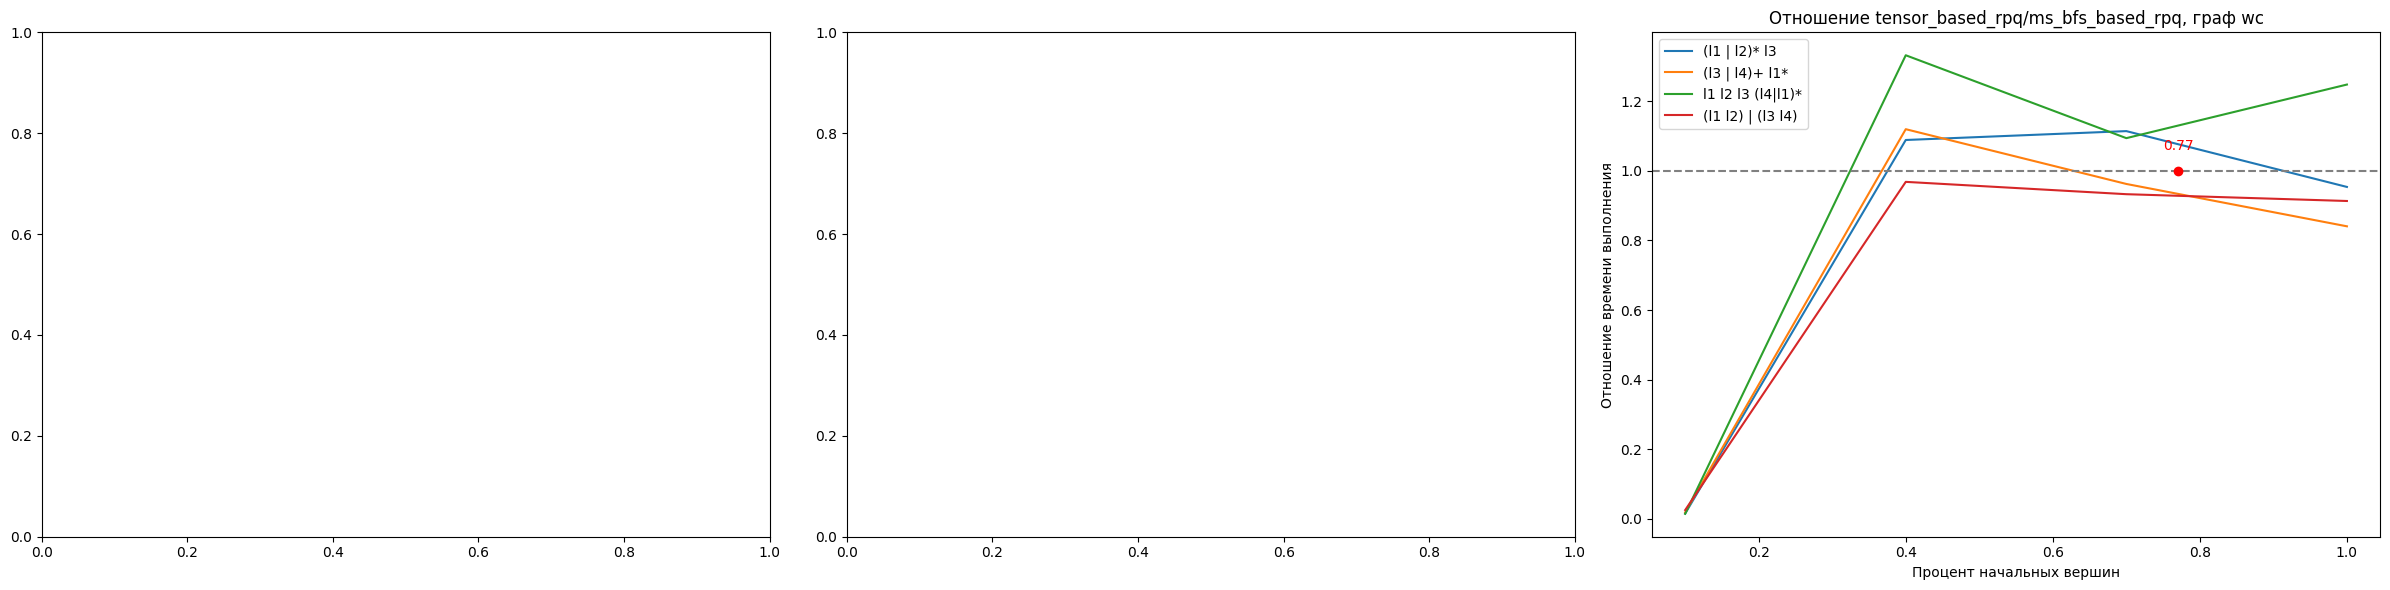

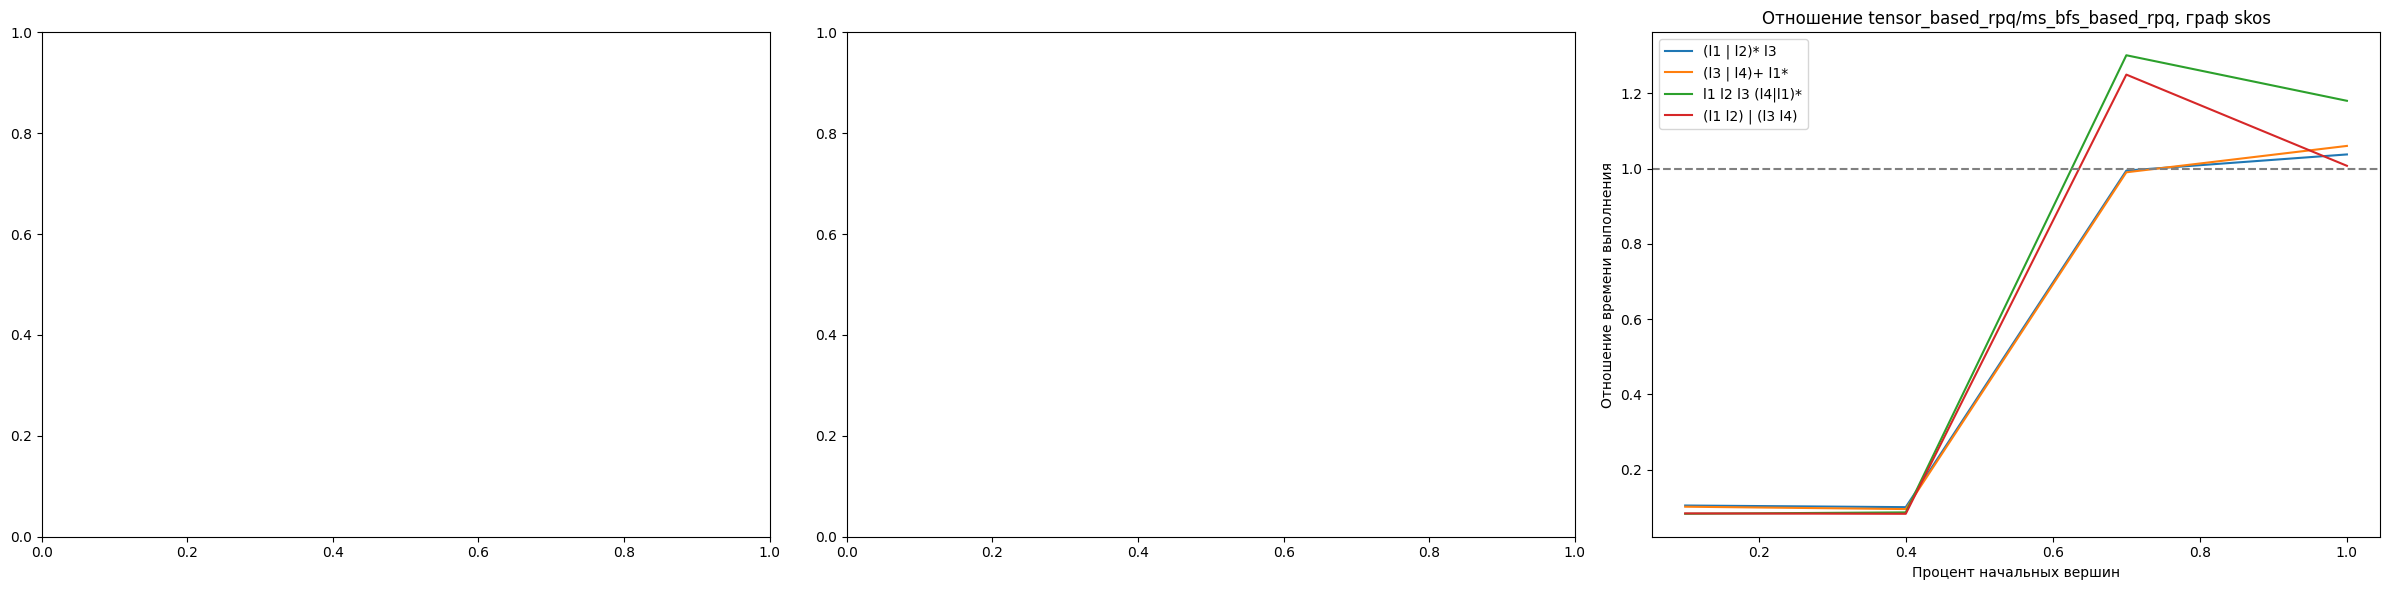

In [ ]:
START_SIZE_PERCENTAGE = [0.1, 0.4, 0.7, 1]

def run_experiment(method: callable, regex: str, graph, start_nodes):
    times = []
    for _ in range(NUM_OF_EXPERIMENTS):
        start_time = time.time()
        method(regex, graph, start_nodes, {})
        final_time = time.time()
        times.append(final_time - start_time)
    return np.mean(times)

def run_rpq_tests(graph_name, method):
    graph = cfpq_data.graph_from_csv(cfpq_data.download(graph_name))
    regex_patterns = regex_with_specified_labels(cfpq_data.get_sorted_labels(graph))

    results = {}
    for start_size_multi in START_SIZE_PERCENTAGE:
        start_nodes = cfpq_data.generate_multiple_source_percent(
            graph, start_size_multi, seed=42
        )
        timings = []

        for regex in regex_patterns:
            mean = run_experiment(method, regex, graph, start_nodes)
            timings.append(mean)
        
        results[start_size_multi] = timings
    return results

def plot_results(graph_name, tensor_results, bfs_results):
    fig, axes = plt.subplots(1, 1, figsize=(24, 6))
    cleaned_regex_patterns = [regex.replace("{", "").replace("}", "") for regex in REGEX_TEMPLATE]

    ax = axes[2]
    intersection_points = []

    for i, regex in enumerate(cleaned_regex_patterns):
        ratio_for_regex = [
            tensor_results[p][i] / bfs_results[p][i] if bfs_results[p][i] > 0 else 0
            for p in START_SIZE_PERCENTAGE
        ]
        ax.plot(START_SIZE_PERCENTAGE, ratio_for_regex, label=regex)

        for j in range(1, len(START_SIZE_PERCENTAGE)):
            if ratio_for_regex[j - 1] > 1 and ratio_for_regex[j] < 1:
                x1, x2 = START_SIZE_PERCENTAGE[j - 1], START_SIZE_PERCENTAGE[j]
                y1, y2 = ratio_for_regex[j - 1], ratio_for_regex[j]
                intersection_x = x1 + (1 - y1) * (x2 - x1) / (y2 - y1)
                intersection_points.append(intersection_x)

    if intersection_points:
        mean_intersection_x = sum(intersection_points) / len(intersection_points)
        ax.scatter(mean_intersection_x, 1, color="red", zorder=5)
        ax.text(mean_intersection_x, 1.05, f"{mean_intersection_x:.2f}", color="red", ha="center", va="bottom")

    ax.set_xlabel("Процент начальных вершин")
    ax.set_ylabel("Отношение времени выполнения")
    ax.set_title(f"Отношение tensor_based_rpq/ms_bfs_based_rpq, граф {graph_name}")
    ax.axhline(1, color="gray", linestyle="--")
    ax.legend(loc="upper left")

    plt.tight_layout()
    plt.show()


tensor = {}
bfs = {}

for graph_name in GRAPHS:
    for mult in START_SIZE_PERCENTAGE:
        tensor[graph_name] = run_rpq_tests(graph_name, tensor_based_rpq)
        bfs[graph_name] = run_rpq_tests(graph_name, ms_bfs_based_rpq)

for graph_name in GRAPHS:
    plot_results(graph_name, tensor[graph_name], bfs[graph_name])


Из результатов видно, что с увеличением относительного количества стартовых вершин `ms_bfs_based_rpq` начинает показывать себя лучше тензорного. Для 3/4 графов при >40% стартовых вершин выгоднее/одинаково решать задачу для все пар вершин, исключением является граф `skos`, где таким показателем является 60%.
Лучше всего решение для всех пар показало себя на графе `wc` - его выделяет отношение вершин к ребрам, где вершин больше.